### Ising model
Theory and implementation:
http://www.bdhammel.com/ising-model/

Implementation: only random initial state

### Standard Potts model
Theory:
https://en.wikipedia.org/wiki/Potts_model

Number of states: 3

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
from numpy.random import RandomState

In [8]:
%matplotlib inline

In [13]:
class PottsLattice:

    def __init__(self, temperature, size, interaction):
        self.size = size
        self.T = temperature
        self.system = self._build_system()
        self.J = interaction

    @property
    def sqr_size(self):
        return (self.size, self.size)

    def _build_system(self):
        """Build the system
        Build a randomly distributed system
        """

        system = np.random.choice([-1, 0, 1], self.sqr_size)

        return system

    def _bc(self, i):
        """Apply periodic boundary condition
        Check if a lattice site coordinate falls out of bounds. If it does,
        apply periodic boundary condition
        Assumes lattice is square
        Parameters
        ----------
        i : int
            lattice site coordinate
        Return
        ------
        int
            corrected lattice site coordinate
        """
        if i >= self.size:
            return 0
        if i < 0:
            return self.size - 1
        else:
            return i
    
    def kronecker(self, spin_1, spin_2):
        '''Kronecker's delta. 
        1 if spin_1 == spin_2, 0 otherwise
        '''
        
        return float(spin_1 == spin_2)
    
    def energy(self, N, M, E):
        #!!! В функцию передавать координаты спина и значение его энергии
        
        """Hamiltonian. Calculate the energy of spin interaction at a given lattice site
             
        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate
        E : int
            spin
        Return
        ------
        float
            energy of the site
        """
        
        energy = self.kronecker(E, self.system[self._bc(N - 1), M]) \
                 + self.kronecker(E, self.system[self._bc(N + 1), M]) \
                 + self.kronecker(E, self.system[N, self._bc(M - 1)]) \
                 + self.kronecker(E, self.system[N, self._bc(M + 1)]) \
    
        return -2 * self.J * energy

In [14]:
def run(lattice, epochs):
    """Run the simulation
    """
          
    cmap = matplotlib.cm.Blues
    
    for epoch in range(epochs):
        
        # Randomly select a site on the lattice
        N, M = np.random.randint(0, lattice.size, 2)
        # Current energy of spin
        en = lattice.system[N, M]
                
        # Calculate energy of a flipped spin (current)
        H_current = lattice.energy(N, M, en)
        
        # Update energy of spin
        N_new, M_new = np.random.randint(0, lattice.size, 2)
        while en == lattice.system[N_new, M_new]:
            N_new, M_new = np.random.randint(0, lattice.size, 2)
        
        en_updated = lattice.system[N_new, M_new]
        H_updated = lattice.energy(N, M, en_updated)
        
        # Calculate difference between updated and current energy
        diff = H_updated - H_current

        # New energy accepted with probabiity 
        if diff <= 0 or RandomState(424242).uniform() < np.exp(-diff/lattice.T):
            lattice.system[N, M] = en_updated

        if epoch % 1000 == 0:
            plt.figure(figsize=(10,10))
            plt.imshow(lattice.system, interpolation='nearest', cmap=cmap)
            plt.show()
            clear_output(wait=True)

In [15]:
# set parameters

t = 1        # temperature 
J = 1        # interaction coefficient
h = 1        # magnetization coefficient
s = 100      # number of sites (s x s lattice)
e = 500000  # number of iterations

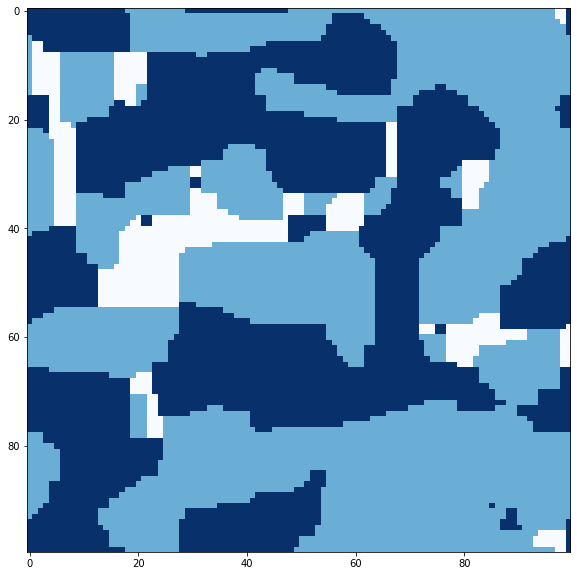

In [16]:
lattice = PottsLattice(
        temperature=t, size=s, interaction=J
    )
run(lattice, e)